# SPRINT 1 - Create DataFrame from raw text files


In [3]:
import zipfile
import pandas as pd
import os

from tqdm import tqdm

def read_text_files(output_dir_path):
    """
    Reads all .txt files from the specified directory using os.walk and returns a DataFrame.
    Each row in the DataFrame contains the file name and its content details.
    """
    files_data = []

    # Gather all file paths first
    all_files = []
    for root, dirs, files in os.walk(output_dir_path):
        for file_name in files:
            if file_name.endswith(".txt"):
                all_files.append(os.path.join(root, file_name))
    
    # Use tqdm to show progress
    for file_path in tqdm(all_files, desc="Reading Text Files"):
        try:
            with open(file_path, "r", encoding="utf-8") as f:
                file_content = f.read().strip().split('\n') 
                file_data = {}
                for line in file_content:
                    key, value = line.split(': ', 1)
                    file_data[key] = value
                file_data['file_name'] = os.path.basename(file_path)
                files_data.append(file_data)
        except UnicodeDecodeError as e:
            print(f"Error reading {file_path}: {e}")

    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(files_data)
    return df

output_dir_path = r"C:\Users\mdimr\Downloads\Project 3 Sentiment\reviews_extracted_files\txt_reviews"
df = read_text_files(output_d
                     
                     
                     ir_path)

# Save the DataFrame to a CSV file
output_csv_path = 'output.csv'
df.to_csv(output_csv_path, index=False)

print(f"DataFrame saved to {output_csv_path}")

Reading Text Files: 100%|████████████████████████████████████████████████████| 568454/568454 [1:37:14<00:00, 97.42it/s]


DataFrame saved to output.csv


In [4]:
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,file_name
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,review_1.txt
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,review_10.txt
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,review_100.txt
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",review_1000.txt
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,review_10000.txt
...,...,...,...,...,...,...,...,...,...,...
568449,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...,review_99995.txt
568450,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when I...,review_99996.txt
568451,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...,review_99997.txt
568452,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...,review_99998.txt


In [5]:
df.to_csv(r"C:\Users\mdimr\Downloads\Project 3 Sentiment\reviews_extracted_files\reviews.csv", index=False)

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Step 1 - Load the Data

In [3]:
df = pd.read_csv(r"C:\Users\mdimr\Downloads\Project 3 Sentiment\reviews_extracted_files\reviews.csv")

df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,file_name
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,review_1.txt
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,review_10.txt
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,review_100.txt
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",review_1000.txt
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,review_10000.txt


# Step 2 - Exploratory Data Analysis

In [4]:
df.shape

(568454, 10)

## Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568428 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
 7   ReviewSummary           568427 non-null  object
 8   ReviewText              568454 non-null  object
 9   file_name               568454 non-null  object
dtypes: int64(4), object(6)
memory usage: 43.4+ MB


In [6]:
df.describe(include='object').T

,count,unique,top,freq
ProductId,568454,74258,B007JFMH8M,913
UserId,568454,256059,A3OXHLG6DIBRW8,448
ProfileName,568428,218415,"C. F. Hill ""CFH""",451
ReviewSummary,568427,295742,Delicious!,2462
ReviewText,568454,393579,"This review will make me sound really stupid, ...",199
file_name,568454,568454,review_1.txt,1


# checking for missing values 

In [7]:
df.isna().sum()

ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
ReviewSummary             27
ReviewText                 0
file_name                  0
dtype: int64

# Imputing Missing values with Mode

In [8]:

# Calculate the mode for 'ProfileName' and 'ReviewSummary'
profile_name_mode = df['ProfileName'].mode()[0]
review_summary_mode = df['ReviewSummary'].mode()[0]

# Fill missing values with the mode without using inplace=True
df['ProfileName'] = df['ProfileName'].fillna(profile_name_mode)
df['ReviewSummary'] = df['ReviewSummary'].fillna(review_summary_mode)

# Verify that there are no more missing values in these columns
print(df.isnull().sum())


ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
file_name                 0
dtype: int64


# 2.a. Explore the Data Distribution of Target Variable

In [37]:
df['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [38]:
df['Score'].value_counts(normalize=True)

Score
5    0.638789
4    0.141885
1    0.091948
3    0.075010
2    0.052368
Name: proportion, dtype: float64

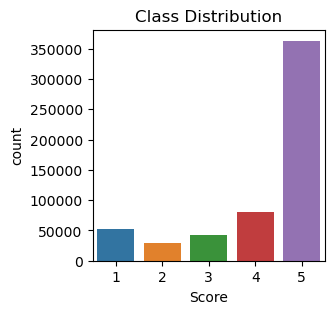

In [9]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Class Distribution")
sns.countplot(data=df, x='Score')

plt.show()


# Mapping Score Ratings

In [10]:
# Define the mapping dictionary
score_mapping = {1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'}

# Apply the mapping to the 'Score' column and create a new column 'Rating'
df['Score_Rating'] = df['Score'].map(score_mapping)

# Display the DataFrame
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,file_name,Score_Rating
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,review_1.txt,positive
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,review_10.txt,positive
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,review_100.txt,negative
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",review_1000.txt,negative
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,review_10000.txt,positive
...,...,...,...,...,...,...,...,...,...,...,...
568449,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,5,1256428800,Good Stuff,I love these noodle. A little to spicy for th...,review_99995.txt,positive
568450,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when I...,review_99996.txt,positive
568451,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...,review_99997.txt,positive
568452,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...,review_99998.txt,positive


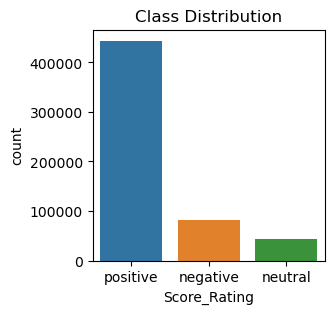

In [11]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Class Distribution")
sns.countplot(data=df, x='Score_Rating')

plt.show()


# 2.b. Visualizing the distribution of most frequent words

### (i) ReviewSummary Most frequent words 

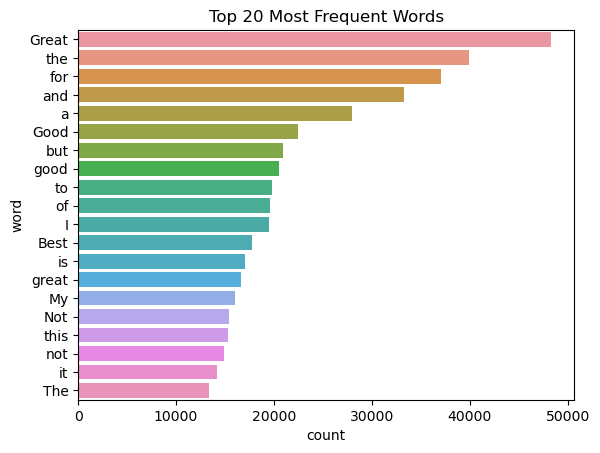

In [42]:
from collections import Counter

# Get all words in the text
all_words = " ".join(df['ReviewSummary'].values).split()
word_counts = Counter(all_words)

# Get the most common words
common_words = word_counts.most_common(20)

# Convert to DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the most common words
sns.barplot(data=common_words_df, x='count', y='word')
plt.title('Top 20 Most Frequent Words')
plt.show()

### (i) ReviewText Most frequent words 

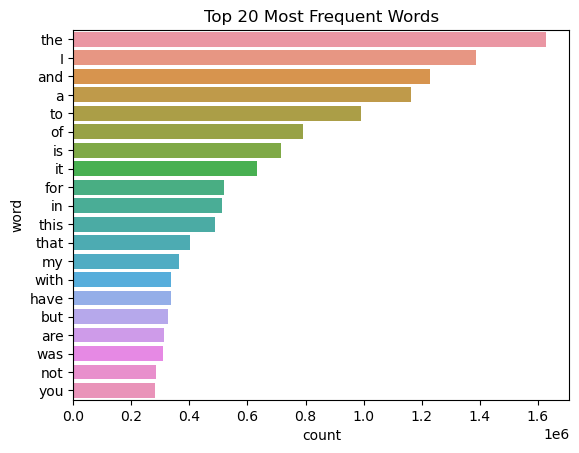

In [43]:
from collections import Counter

# Get all words in the text
all_words = " ".join(df['ReviewText'].values).split()
word_counts = Counter(all_words)

# Get the most common words
common_words = word_counts.most_common(20)

# Convert to DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the most common words
sns.barplot(data=common_words_df, x='count', y='word')
plt.title('Top 20 Most Frequent Words')
plt.show()

# Helpfulness of reviews 

In [6]:
# Calculate Helpfulness ratio
df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
df.loc[df['Helpfulness'].isnull(), 'Helpfulness'] = 0


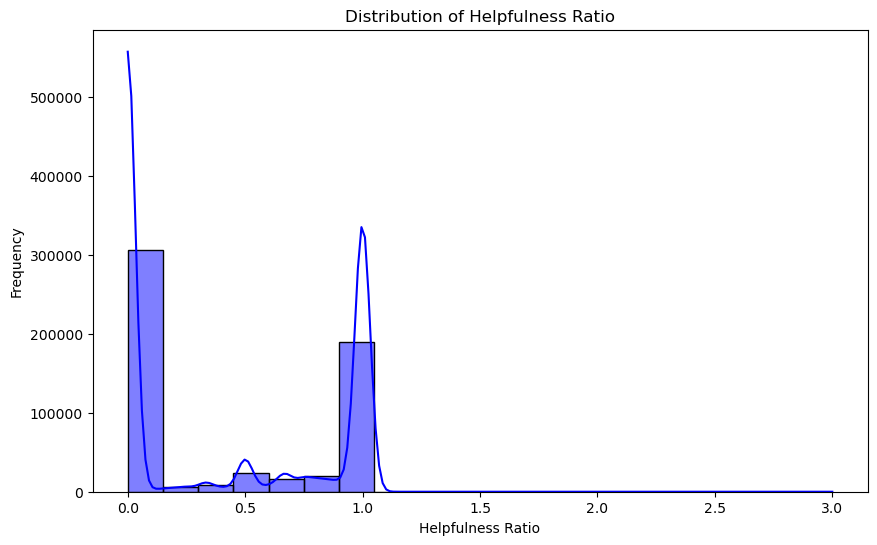

In [45]:
# Visualization - Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Helpfulness'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of Helpfulness Ratio')
plt.xlabel('Helpfulness Ratio')
plt.ylabel('Frequency')
plt.show()


# Bivariant Analysis

# 2.c.  Classwise WordCloud - Explore the Relationships between each pair of Inputs and Output

## (i)  ReviewSummary WordCloud 

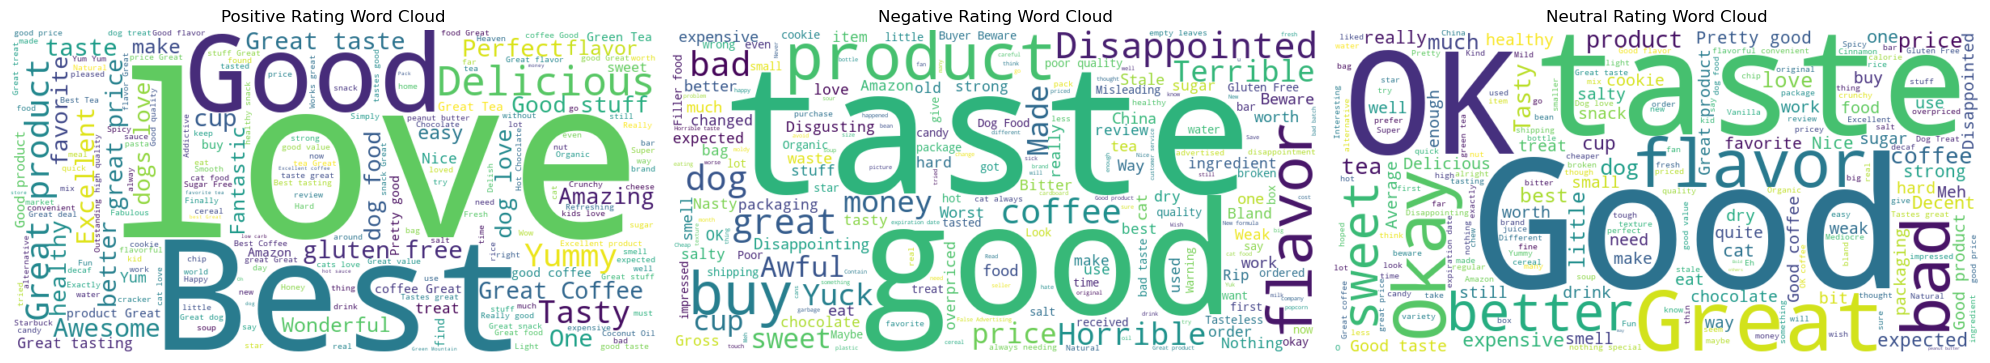

In [14]:
from wordcloud import WordCloud

# Word cloud for positive messages
pos_text = " ".join(df[df['Score_Rating'] == 'positive']['ReviewSummary'].values)
pos_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_text)

# Word cloud for negative messages
neg_text = " ".join(df[df['Score_Rating'] == 'negative']['ReviewSummary'].values)
neg_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neg_text)

# Word cloud for neutral messages
neu_text = " ".join(df[df['Score_Rating'] == 'neutral']['ReviewSummary'].values)
neu_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neu_text)


# Display the word clouds
fig, ax = plt.subplots(1, 3, figsize=(20, 7))
ax[0].imshow(pos_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Positive Rating Word Cloud')
ax[1].imshow(neg_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Negative Rating Word Cloud')
ax[2].imshow(neu_wordcloud, interpolation='bilinear')  # Use ax[2] for neutral word cloud
ax[2].axis('off')
ax[2].set_title('Neutral Rating Word Cloud')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## (ii)  ReviewText Wordcloud

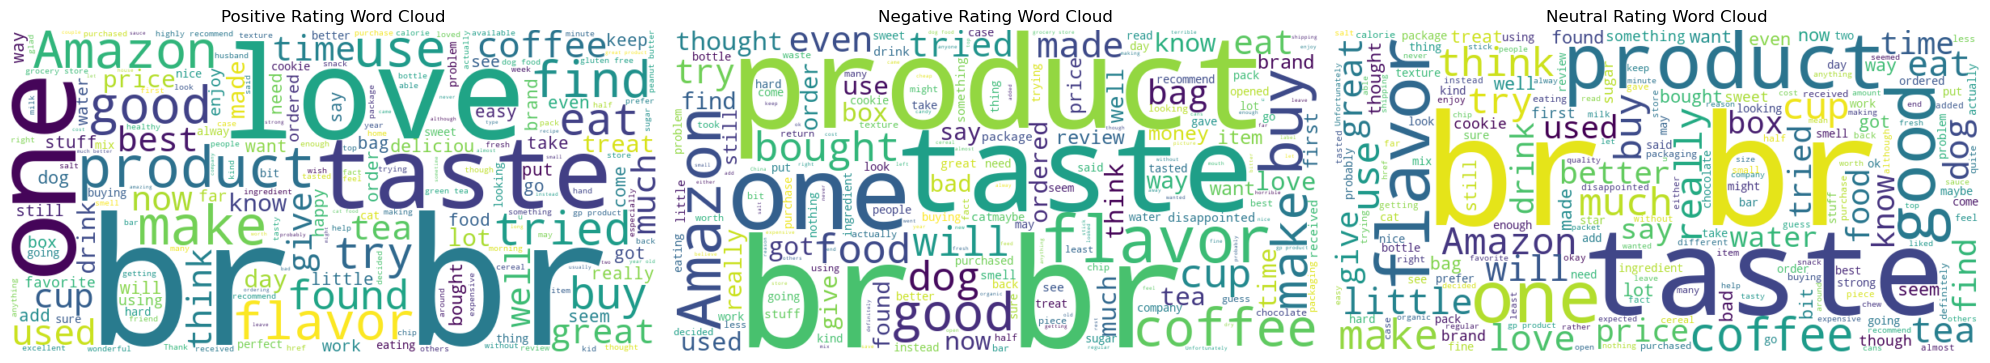

In [15]:
from wordcloud import WordCloud

# Word cloud for positive messages
pos_text = " ".join(df[df['Score_Rating'] == 'positive']['ReviewText'].values)
pos_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_text)

# Word cloud for negative messages
neg_text = " ".join(df[df['Score_Rating'] == 'negative']['ReviewText'].values)
neg_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neg_text)

# Word cloud for neutral messages
neu_text = " ".join(df[df['Score_Rating'] == 'neutral']['ReviewText'].values)
neu_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neu_text)


# Display the word clouds
fig, ax = plt.subplots(1, 3, figsize=(20, 7))
ax[0].imshow(pos_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Positive Rating Word Cloud')
ax[1].imshow(neg_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Negative Rating Word Cloud')
ax[2].imshow(neu_wordcloud, interpolation='bilinear')  # Use ax[2] for neutral word cloud
ax[2].axis('off')
ax[2].set_title('Neutral Rating Word Cloud')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## (iii) Top 10 products with Positive Score

Top 10 Most Repeated Products:
            Count  Average Score
ProductId                       
B007JFMH8M    913       4.582694
B0026RQTGE    632       4.588608
B002QWHJOU    632       4.588608
B002QWP89S    632       4.588608
B002QWP8H0    632       4.588608
B003B3OOPA    623       4.739968
B001EO5Q64    567       4.746032
B0026KPDG8    564       4.310284
B000VK8AVK    564       4.310284
B006HYLW32    564       4.310284


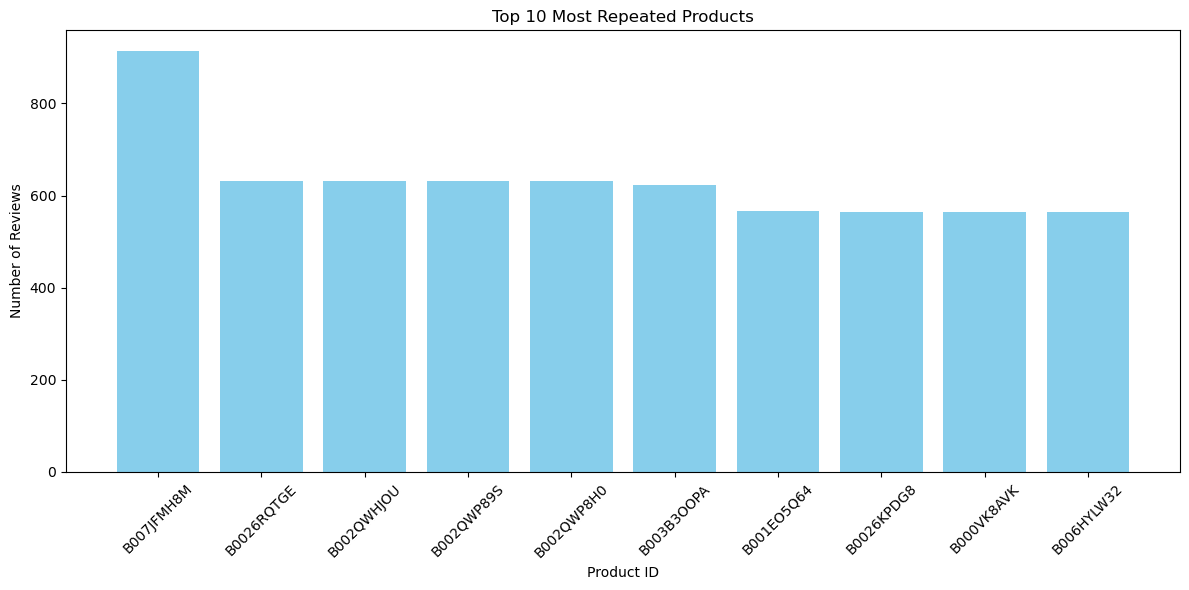

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame named df

# Group by ProductId and count occurrences
product_counts = df['ProductId'].value_counts()

# Get unique ProductIds and their corresponding scores
product_scores = df.groupby('ProductId')['Score'].mean()

# Create a DataFrame to store ProductId, Count, and Average Score
product_info = pd.DataFrame({'Count': product_counts, 'Average Score': product_scores})

# Sort by Count to find most repeated products
product_info_sorted = product_info.sort_values(by='Count', ascending=False)

# Print the top 10 most repeated products
print("Top 10 Most Repeated Products:")
print(product_info_sorted.head(10))

# Plotting: Bar plot of the top 10 most repeated products and their average score
top_products = product_info_sorted.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_products.index, top_products['Count'], color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Most Repeated Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Trend Over 12 years

 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  3.23it/s]

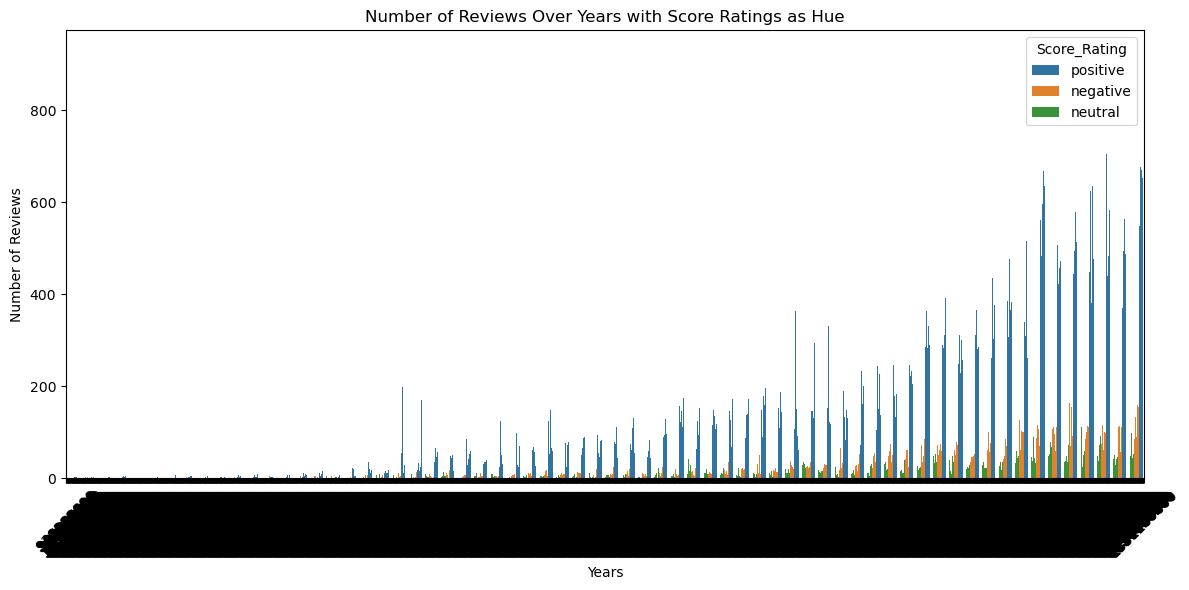

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [04:11<00:00, 125.66s/it]


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Import tqdm for progress bar

# Assuming df is your DataFrame containing 'Time', 'Score_Rating', and other relevant columns
# Group by Time and Score_Rating to count number of reviews
with tqdm(total=2) as pbar:  # Set total to 2 for two main steps: groupby and plotting
    df_counts = df.groupby(['Time', 'Score_Rating']).size().reset_index(name='Count')
    pbar.update(1)  # Update progress bar after completing groupby step

    # Plotting bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Time', y='Count', hue='Score_Rating', data=df_counts)
    plt.title('Number of Reviews Over Years with Score Ratings as Hue')
    plt.xlabel('Years')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    pbar.update(1)  # Update progress bar after completing plotting


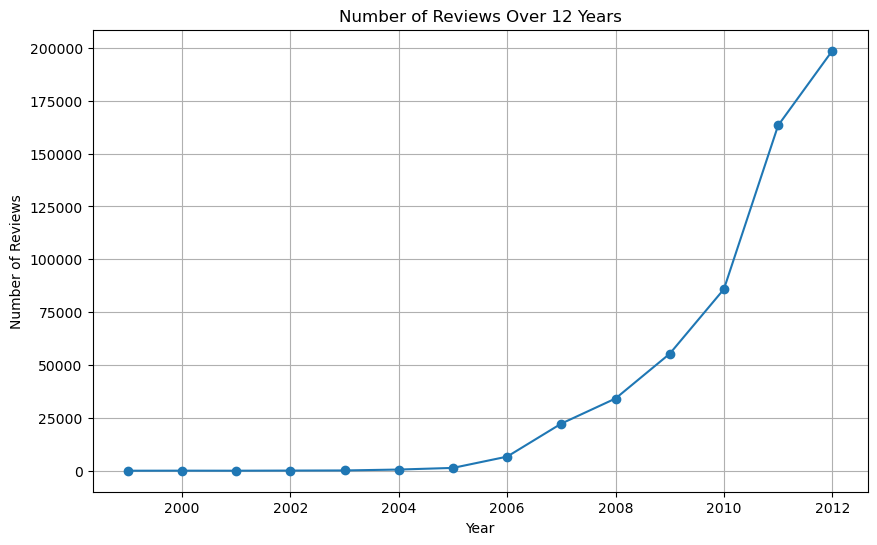

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame named df
# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Extract year from datetime
df['Year'] = df['Time'].dt.year

# Group by year and count occurrences
yearly_counts = df['Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', marker='o')
plt.title('Number of Reviews Over 12 Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


# SPRINT 2 - Build a model


### Data Preparation and Model Building Pipeline
3. Segregate the Inputs (X) and Output (y)
4. Split into train and test (X_train, X_test, y_train, y_test)
5. Data Preparation: Data Cleaning and Feature Engineering.
6. Clean the training data
7. Preprocess the training data (X_train_transformed)
8. Training Phase: Build a model
9. Preprocess the test data (X_test_transformed)
10. Predict on unseen data
11. Evaluate the model performance

# Here we are selecting 50,000 samples from original dataset

In [49]:
from sklearn.model_selection import train_test_split

strata_column = 'Score_Rating'

# Perform Stratified Sampling
df_sample, _ = train_test_split(df, test_size=(len(df) - 50000) / len(df), stratify=df[strata_column], random_state=42)

# Check the size of the sampled dataset
print("Sampled Dataset Size:", len(df_sample))

Sampled Dataset Size: 50000


# Step 3 - Segregate Inputs (X) and Output (y)

In [50]:
# Define the predictors (X) and target variable (y)
X = df_sample[['ReviewText']]

y = df_sample['Score_Rating']

# Step 4 - Split the data into Train and Test

In [51]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(35000, 1) (35000,)
(15000, 1) (15000,)


## Task A - Perform data preprocessing on the given text data and convert it into numerical vectors Using BOW


## Step 5 and 7 - Data Preparation on Train and Test Data

## (i) Data Cleaning for Train Data

In [52]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from textblob import TextBlob

def clean(doc):
    
    # Ensure doc is a string
    if isinstance(doc, str):
        # HTML Parsing and Cleanup
        soup = BeautifulSoup(doc, "html.parser")
        doc = soup.get_text()
    else:
        raise ValueError("Input should be a string containing HTML content.")

    # Removing Special characters
    regex = '[^a-zA-Z\s]'
    doc = re.sub(regex, '', doc)

    # Lowercase text
    text = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    custom_stop_words = {'br','one','product','will','flavor','love','taste'}
    stop_words = stop_words.union(custom_stop_words)
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join and return
    return " ".join(lemmatized_tokens)

In [53]:
def tokenizer(doc):
    # Tokenization
    return nltk.word_tokenize(doc) 

### (i) Review Summary Cleaning and Transforming

In [54]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectoriezer
bow_vect = CountVectorizer(token_pattern=None,
                           tokenizer=tokenizer,
                           ngram_range=(1, 1), 
                           lowercase=False, 
                           preprocessor=clean, 
                           stop_words=None)

# use it to extract features from training data
%time X_train_transformed = bow_vect.fit_transform(X_train['ReviewText'])

print()
print(f"Shape of X_train_transformed (# of docs, # of unique vocabulary): {X_train_transformed.shape}")
print(f"Type of X_train_transformed (i.e. Compressed Sparse Row (CSR) format): {type(X_train_transformed)}")
print(f"Vocabulary learned: {bow_vect.get_feature_names_out()[:10]}")

CPU times: total: 1min 6s
Wall time: 1min 56s

Shape of X_train_transformed (# of docs, # of unique vocabulary): (35000, 54936)
Type of X_train_transformed (i.e. Compressed Sparse Row (CSR) format): <class 'scipy.sparse._csr.csr_matrix'>
Vocabulary learned: ['aa' 'aaaaa' 'aaaahs' 'aaah' 'aaahhhhhh' 'aafco' 'aafcoa' 'aahing' 'aand'
 'ab']


In [55]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()
df_sample['clean_ReviewText'] = df_sample['ReviewText'].progress_apply(lambda x : clean(x))
df_sample[['ReviewText','clean_ReviewText']]

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:10<00:00, 382.37it/s]


,ReviewText,clean_ReviewText
112761,I love the fresh taste of Sophia's dressing an...,fresh sophias dressing highly recommend salad ...
135384,I had tried the Mighty Leaf Chamomole Citrus t...,tried mighty leaf chamomole citrus tea restaur...
207951,"The Classic Malt is not bad, but is not as tas...",classic malt bad tasty chocolate malt bought c...
344479,"Great stuff, I have quite a variety of teas, b...",great stuff quite variety tea best great hot c...
503208,"I've had sweet potato fries before, and they r...",ive sweet potato fry really delicious wanted g...
...,...,...
471951,"I really like these, however the youngsters di...",really like however youngster didnti didnt loo...
476032,I have purchased these 3 or 4 times by now in ...,purchased time bulk taste like starbucks cup c...
31680,This is a very mild Merlot. Extremely smooth c...,mild merlot extremely smooth chocolaty start s...
67490,Already buy this feed regularly and very pleas...,already buy feed regularly pleased first time ...


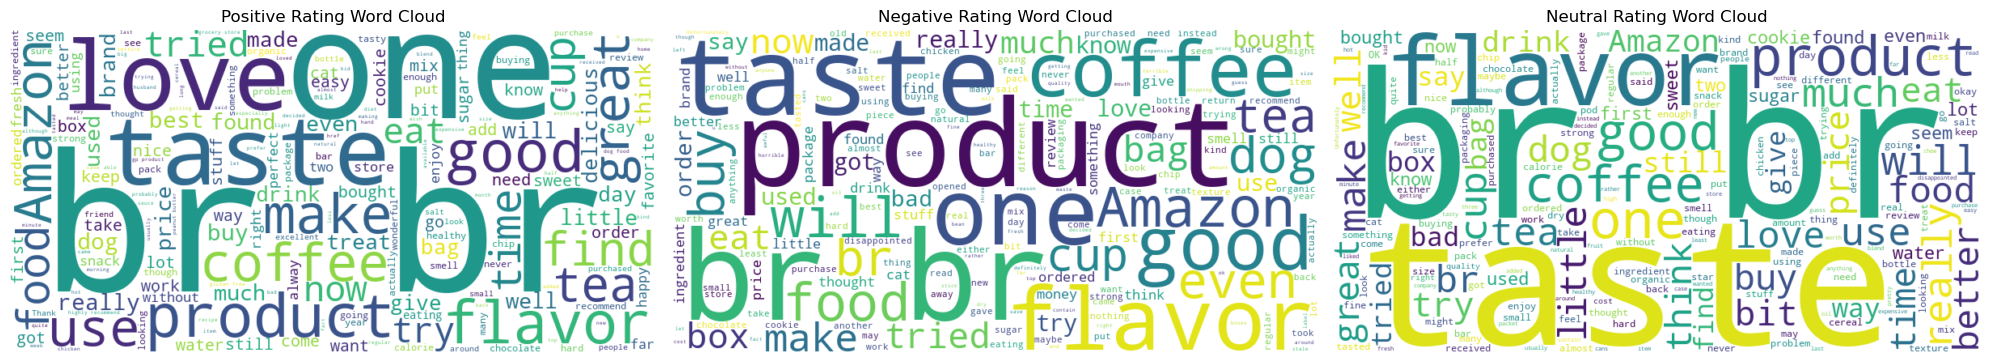

In [23]:
from wordcloud import WordCloud

# Word cloud for positive messages
pos_text = " ".join(df_sample[df_sample['Score_Rating'] == 'positive']['ReviewText'].values)
pos_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_text)

# Word cloud for negative messages
neg_text = " ".join(df_sample[df_sample['Score_Rating'] == 'negative']['ReviewText'].values)
neg_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neg_text)

# Word cloud for neutral messages
neu_text = " ".join(df_sample[df_sample['Score_Rating'] == 'neutral']['ReviewText'].values)
neu_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neu_text)


# Display the word clouds
fig, ax = plt.subplots(1, 3, figsize=(20, 7))
ax[0].imshow(pos_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Positive Rating Word Cloud')
ax[1].imshow(neg_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Negative Rating Word Cloud')
ax[2].imshow(neu_wordcloud, interpolation='bilinear')  # Use ax[2] for neutral word cloud
ax[2].axis('off')
ax[2].set_title('Neutral Rating Word Cloud')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Step 7 - Apply Data Prepartion on Test Data

In [56]:
X_test_transformed = bow_vect.transform(X_test['ReviewText'])
print(f'Shape of X_test_transformed: {X_test_transformed.shape}') 

Shape of X_test_transformed: (15000, 54936)


# Task B - Build models to predict the Score of a given text review.

# Step 6,8,9 - Training and Testing Phase

# a. Naive Bayes

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import f1_score

# Building the Model
classifier = MultinomialNB() 
%time classifier.fit(X_train_transformed, y_train)

# Predicting on unseen data
%time y_test_pred = classifier.predict(X_test_transformed)

# Model Evaluation
print()
print()
f1 = f1_score(y_test, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's F1 Score: {f1:.4f}")



CPU times: total: 125 ms
Wall time: 274 ms
CPU times: total: 0 ns
Wall time: 25.1 ms


Model's F1 Score: 0.7826


In [24]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.75      0.41      0.53      2187
     neutral       0.55      0.02      0.05      1137
    positive       0.83      0.98      0.90     11676

    accuracy                           0.83     15000
   macro avg       0.71      0.47      0.49     15000
weighted avg       0.80      0.83      0.78     15000



# b. Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

# Building the Model
classifier = LogisticRegression()
%time classifier.fit(X_train_transformed, y_train)

# Predicting on unssen data
%time y_test_pred = classifier.predict(X_test_transformed)

# Model Evaluation
print()
print()
f1 = f1_score(y_test, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's F1 Score: {f1:.4f}")


CPU times: total: 32.8 s
Wall time: 1min
CPU times: total: 46.9 ms
Wall time: 76.1 ms


Model's F1 Score: 0.8319


# c. Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

# Building the Model
classifier = DecisionTreeClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Predicting on unseen data
%time y_test_pred = classifier.predict(X_test_transformed)

# Model's Evaluation
print()
print()
f1 = f1_score(y_test, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's F1 Score: {f1:.4f}")


CPU times: total: 2min 18s
Wall time: 2min 49s
CPU times: total: 15.6 ms
Wall time: 49.3 ms


Model's F1 Score: 0.7682


# d. KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# Building the Model
classifier = KNeighborsClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Predicting on unseen data
%time y_test_pred = classifier.predict(X_test_transformed)

# Model's Evaluation
print()
print()
f1 = f1_score(y_test, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's F1 Score: {f1:.4f}")


CPU times: total: 46.9 ms
Wall time: 70.6 ms
CPU times: total: 46.3 s
Wall time: 55.7 s


Model's F1 Score: 0.7159


# e. Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Building the Model
classifier = RandomForestClassifier()
%time classifier.fit(X_train_transformed, y_train)

# Predicting on unseen data
%time y_test_pred = classifier.predict(X_test_transformed)

# Model's Evaluation
print()
print()
f1 = f1_score(y_test, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's F1 Score: {f1:.4f}")

CPU times: total: 13min 8s
Wall time: 17min 51s
CPU times: total: 3.19 s
Wall time: 4.41 s


Model's F1 Score: 0.7679




# Task A - Perform data preprocessing on the given text data and convert it into numerical vectors using TFIDF


## TF IDF Text Vectorization: Apply TfidfVectorizer (Note: We won't use TF IDF Text Vectorization)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(token_pattern=None,
                             tokenizer = tokenizer,
                             ngram_range=(1, 1), 
                             lowercase=False, 
                             preprocessor=clean, 
                             stop_words=None)

out = tfidf_vect.fit_transform(X_train['ReviewText'])

print(f"Shape of output (# of docs, # of unique vocabulary): {out.shape}")

print(f"Type of output (i.e. Compressed Sparse Row (CSR) format): {type(out)}")

Shape of output (# of docs, # of unique vocabulary): (35000, 54936)
Type of output (i.e. Compressed Sparse Row (CSR) format): <class 'scipy.sparse._csr.csr_matrix'>


In [64]:
X_test_transformed = tfidf_vect.transform(X_test['ReviewText'])
print(f'Shape of X_test_transformed: {X_test_transformed.shape}') 

Shape of X_test_transformed: (15000, 54936)


# Task B - Build models to predict the Score of a given text review.


# a. Naive Bayes

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Building the Model
classifier = MultinomialNB() 
%time classifier.fit(out, y_train)

# Predicting on unseen data
%time y_test_pred = classifier.predict(X_test_transformed)

# Model Evaluation
print()
print()
f1 = f1_score(y_test, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's F1 Score: {f1:.4f}")


CPU times: total: 219 ms
Wall time: 282 ms
CPU times: total: 0 ns
Wall time: 15.6 ms


Model's F1 Score: 0.6820


# b.Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

# Building the Model
classifier = LogisticRegression()
%time classifier.fit(out, y_train)

# Predicting on unssen data
%time y_test_pred = classifier.predict(X_test_transformed)

# Model Evaluation
print()
print()
f1 = f1_score(y_test, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's F1 Score: {f1:.4f}")


CPU times: total: 25.9 s
Wall time: 34 s
CPU times: total: 62.5 ms
Wall time: 60.1 ms


Model's F1 Score: 0.8168


# c. Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

# Building the Model
classifier = DecisionTreeClassifier()
%time classifier.fit(out, y_train)

# Predicting on unseen data
%time y_test_pred = classifier.predict(X_test_transformed)

# Model's Evaluation
print()
print()
f1 = f1_score(y_test, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's F1 Score: {f1:.4f}")


CPU times: total: 2min 13s
Wall time: 3min 55s
CPU times: total: 15.6 ms
Wall time: 62.8 ms


Model's F1 Score: 0.7573


# d. KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier

# Building the Model
classifier = KNeighborsClassifier()
%time classifier.fit(out, y_train)

# Predicting on unseen data
%time y_test_pred = classifier.predict(X_test_transformed)

# Model's Evaluation
print()
print()
f1 = f1_score(y_test, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's F1 Score: {f1:.4f}")


CPU times: total: 15.6 ms
Wall time: 87.3 ms
CPU times: total: 14min 7s
Wall time: 11min 59s


Model's F1 Score: 0.7347


# e.Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Building the Model
classifier = RandomForestClassifier()
%time classifier.fit(out, y_train)

# Predicting on unseen data
%time y_test_pred = classifier.predict(X_test_transformed)

# Model's Evaluation
print()
print()
f1 = f1_score(y_test, y_test_pred, average='weighted')  # Use 'weighted' for multiclass
print(f"Model's F1 Score: {f1:.4f}")



CPU times: total: 8min 40s
Wall time: 15min 6s
CPU times: total: 2.48 s
Wall time: 4.48 s


Model's F1 Score: 0.7644


# Client Expectations

## 2.Show me the comparison of various ML models.


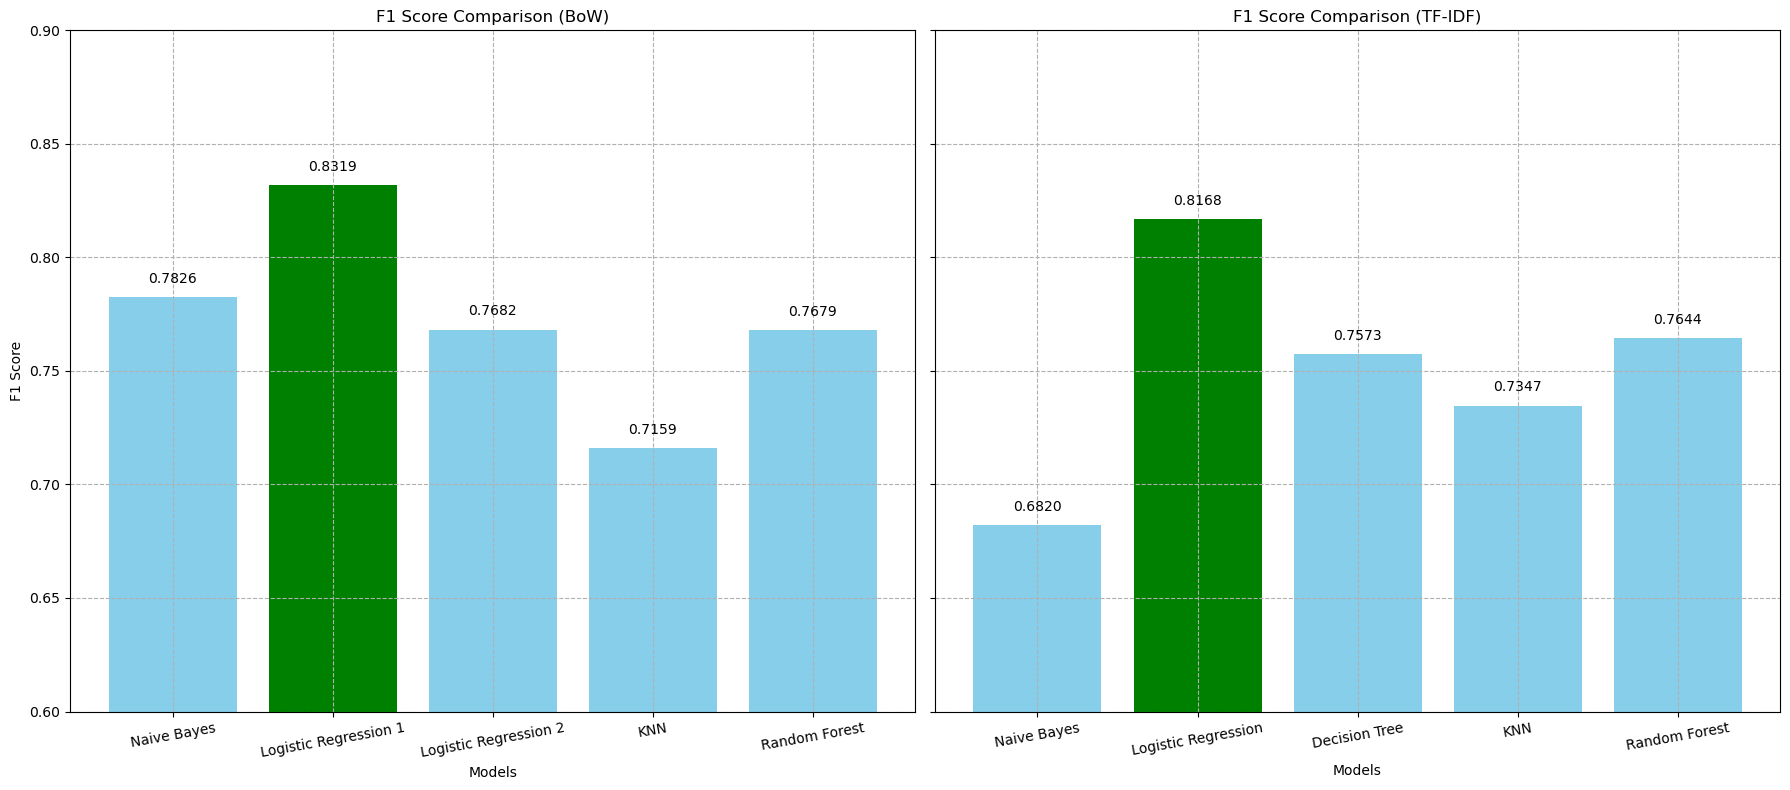

In [17]:
import matplotlib.pyplot as plt

# Model names
models_bow = ['Naive Bayes', 'Logistic Regression 1', 'Logistic Regression 2', 'KNN', 'Random Forest']
models_tfidf = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest']

# F1 scores for BoW
f1_scores_bow = [0.7826, 0.8319, 0.7682, 0.7159, 0.7679]

# F1 scores for TF-IDF
f1_scores_tfidf = [0.6820, 0.8168, 0.7573, 0.7347, 0.7644]

# Determine the highest accuracy
max_f1_bow = max(f1_scores_bow)
max_f1_tfidf = max(f1_scores_tfidf)

# Plotting the F1 scores
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# BoW plot
axes[0].bar(models_bow, f1_scores_bow, color=['green' if score == max_f1_bow else 'skyblue' for score in f1_scores_bow])
axes[0].set_title('F1 Score Comparison (BoW)')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('F1 Score')
axes[0].set_ylim(0.6, 0.9)  # Set y-axis limits for better comparison
axes[0].grid(True, ls="--")
axes[0].tick_params(axis='x', rotation=10)

# TF-IDF plot
axes[1].bar(models_tfidf, f1_scores_tfidf, color=['green' if score == max_f1_tfidf else 'skyblue' for score in f1_scores_tfidf])
axes[1].set_title('F1 Score Comparison (TF-IDF)')
axes[1].set_xlabel('Models')
axes[1].grid(True, ls="--")
axes[1].tick_params(axis='x', rotation=10)

# Adding text labels for better readability
for i, score in enumerate(f1_scores_bow):
    axes[0].text(i, score + 0.005, f'{score:.4f}', ha='center', va='bottom', fontsize=10)

for i, score in enumerate(f1_scores_tfidf):
    axes[1].text(i, score + 0.005, f'{score:.4f}', ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


* Based on the evaluation of accuracy and training time of **TF-IDF Technique**, **Logistic Regression** and **MultinomialNB (Naive Bayes)** stand out as the most suitable models for deployment due to their lightweight nature in terms of computational requirements and efficient training times.

# 3. Model should be light for deployment.

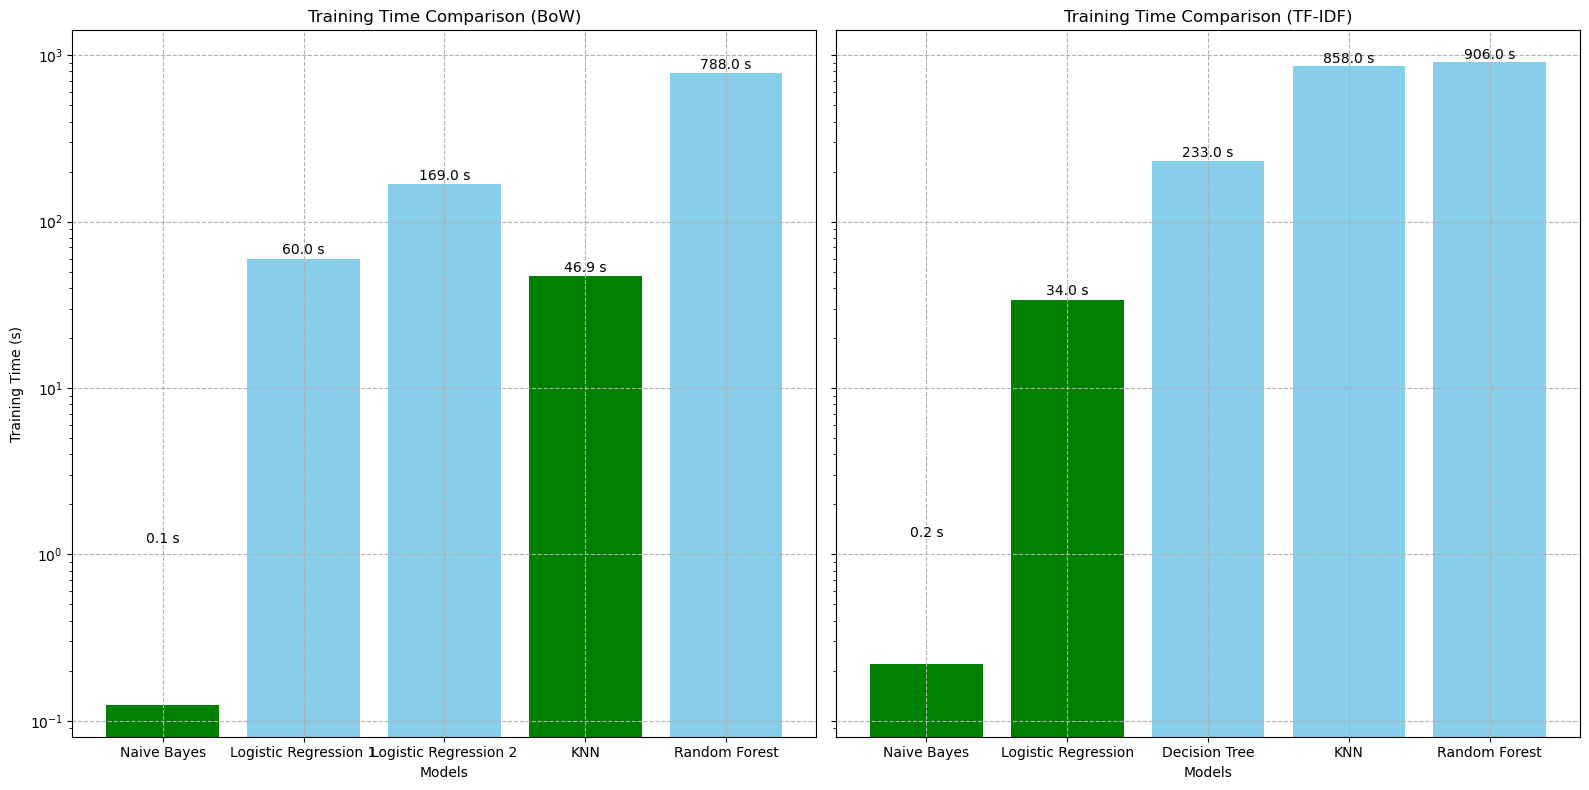

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models_bow = ['Naive Bayes', 'Logistic Regression 1', 'Logistic Regression 2', 'KNN', 'Random Forest']
models_tfidf = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest']

# Training times in seconds
training_times_bow = [0.125, 60, 169, 46.9, 788]  # Converted from the given times
training_times_tfidf = [0.219, 34, 233, 858, 906]  # Converted from the given times

# Determine the two lowest training times
sorted_train_times_bow = np.argsort(training_times_bow)[:2]
sorted_train_times_tfidf = np.argsort(training_times_tfidf)[:2]

# Plotting the training times
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# BoW plot
colors_bow = ['green' if i in sorted_train_times_bow else 'skyblue' for i in range(len(training_times_bow))]
axes[0].bar(models_bow, training_times_bow, color=colors_bow)
axes[0].set_title('Training Time Comparison (BoW)')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Training Time (s)')
axes[0].set_yscale('log')
axes[0].grid(True, ls="--")

# TF-IDF plot
colors_tfidf = ['green' if i in sorted_train_times_tfidf else 'skyblue' for i in range(len(training_times_tfidf))]
axes[1].bar(models_tfidf, training_times_tfidf, color=colors_tfidf)
axes[1].set_title('Training Time Comparison (TF-IDF)')
axes[1].set_xlabel('Models')
axes[1].set_yscale('log')
axes[1].grid(True, ls="--")

# Adding text labels for better readability
for i, time in enumerate(training_times_bow):
    axes[0].text(i, time + 1, f'{time:.1f} s', ha='center', va='bottom', fontsize=10)

for i, time in enumerate(training_times_tfidf):
    axes[1].text(i, time + 1, f'{time:.1f} s', ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


**Deployment Suitability:**
* **Logistic Regression** and **Navie Bayes** is lightweight in terms of both model size and computational requirements. It offers a good balance between accuracy and efficiency, making it highly suitable for deployment, especially in scenarios where real-time predictions or batch processing with limited resources are required.


# 4. Model should have very less latency

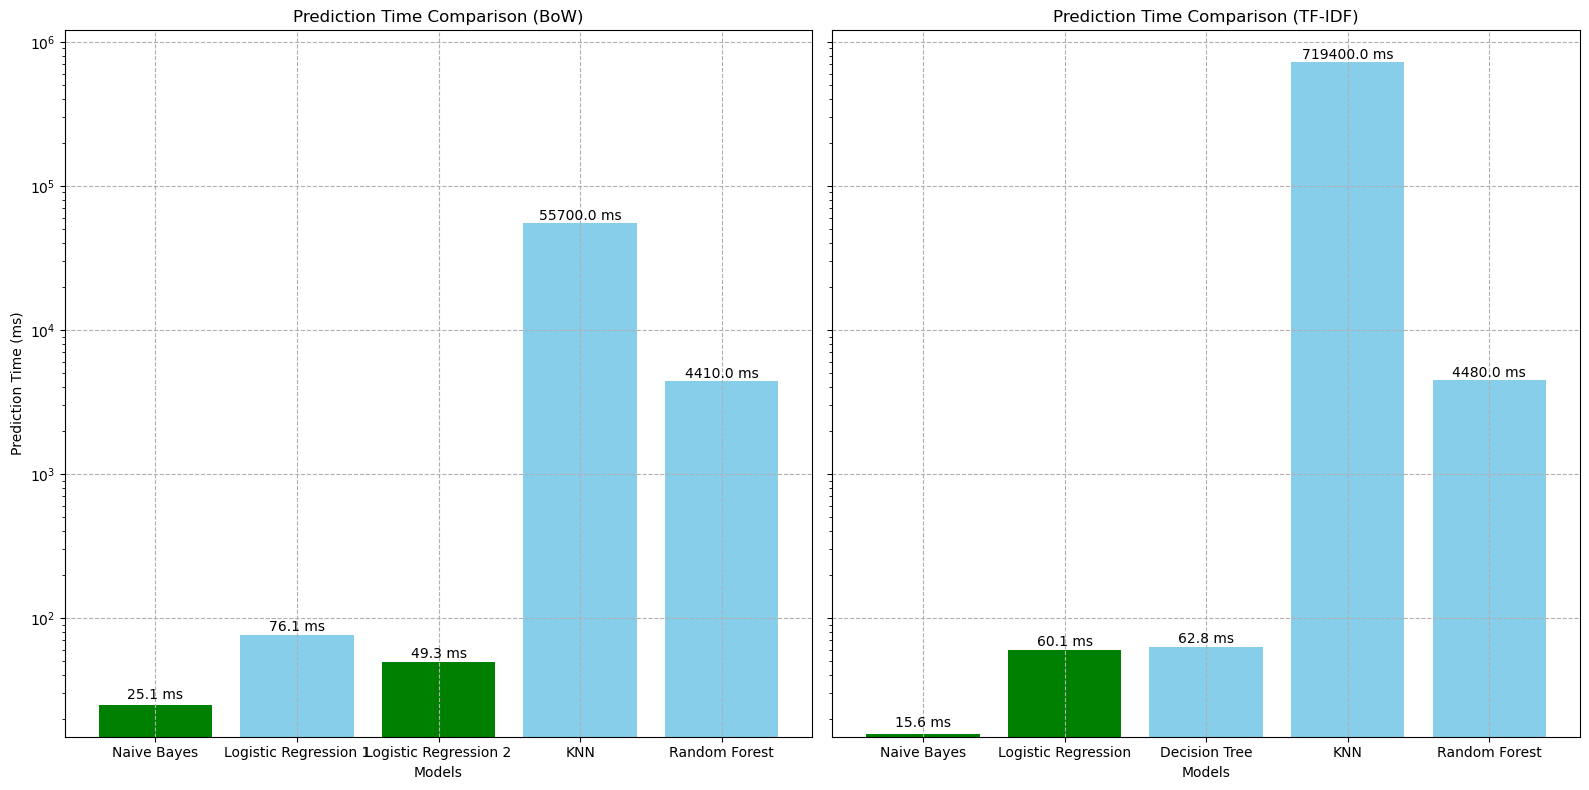

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models_bow = ['Naive Bayes', 'Logistic Regression 1', 'Logistic Regression 2', 'KNN', 'Random Forest']
models_tfidf = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest']

# Prediction times in milliseconds
prediction_times_bow = [25.1, 76.1, 49.3, 55700, 4410]
prediction_times_tfidf = [15.6, 60.1, 62.8, 719400, 4480]

# Determine the two lowest prediction times
sorted_pred_times_bow = np.argsort(prediction_times_bow)[:2]
sorted_pred_times_tfidf = np.argsort(prediction_times_tfidf)[:2]

# Plotting the prediction times
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# BoW plot
colors_bow = ['green' if i in sorted_pred_times_bow else 'skyblue' for i in range(len(prediction_times_bow))]
axes[0].bar(models_bow, prediction_times_bow, color=colors_bow)
axes[0].set_title('Prediction Time Comparison (BoW)')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Prediction Time (ms)')
axes[0].set_yscale('log')
axes[0].grid(True, ls="--")

# TF-IDF plot
colors_tfidf = ['green' if i in sorted_pred_times_tfidf else 'skyblue' for i in range(len(prediction_times_tfidf))]
axes[1].bar(models_tfidf, prediction_times_tfidf, color=colors_tfidf)
axes[1].set_title('Prediction Time Comparison (TF-IDF)')
axes[1].set_xlabel('Models')
axes[1].set_yscale('log')
axes[1].grid(True, ls="--")

# Adding text labels for better readability
for i, time in enumerate(prediction_times_bow):
    axes[0].text(i, time + 1, f'{time:.1f} ms', ha='center', va='bottom', fontsize=10)

for i, time in enumerate(prediction_times_tfidf):
    axes[1].text(i, time + 1, f'{time:.1f} ms', ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


# Conclusion

### Preference: 
* **TF-IDF** is preferred over **BoW**  for its ability to weigh word importance.
### Accuracy: 
* **Logistic Regression** excels with F1 scores of **0.8319 (BoW)** and **0.8168 (TF-IDF)**.
### Deployment Time: 
* **Logistic Regression** trains faster than other models, around **34 seconds** with TF-IDF.
### Latency: 
* Predictions are quick for **Logistic Regression** , approximately **60.1 milliseconds** with TF-IDF.


# Recommendation: 
* **Logistic Regression with TF-IDF** is recommended for its high accuracy, fast training, and low prediction times, ideal for real-time applications.